In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.constants import k

In [2]:
def simulate(phi):
    #initial conditions & parameters
    M=0.25
    epsilon=0.25
    dt=0.25
    dx=1.
    inversexsq=1./(dx*dx)
    laplacian=(np.roll(phi, 1, 0)+np.roll(phi, 1, 1)+np.roll(phi, -1, 0)+np.roll(phi, -1, 1)-4*phi)*inversexsq
    #find difference per timestep
    functional=phi*(2-phi*(6-4*phi))-epsilon*laplacian
    laplace_func=(np.roll(functional, 1, 0)+np.roll(functional, 1, 1)+np.roll(functional, -1, 0)+np.roll(functional, -1, 1)-4*functional)*inversexsq
    deltaphi=M*dt*laplace_func
    #standard deviation of noise and array generation
    std=np.sqrt(2*k*M*300) #assume 300Kelvin for temperature
    r=np.random.random((len(phi), len(phi[0])))
    th=np.random.random((len(phi), len(phi[0])))
    noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std
    #update phi with noise
    phinew=phi+deltaphi+noise
    return phinew
    

In [15]:
#generate test data
#noise=noise_into_array(200, 0.05)
M=0.25
std=np.sqrt(2*k*M*300)
r=np.random.random((200, 200))
th=np.random.random((200, 200))
#a=fill_noise_array(200, 0.01)

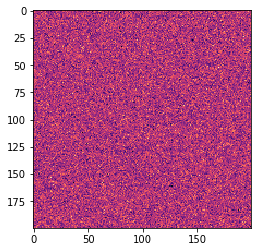

In [16]:
noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std
grid=noise+0.5
plt.imshow(grid, cmap='magma')
plt.show()

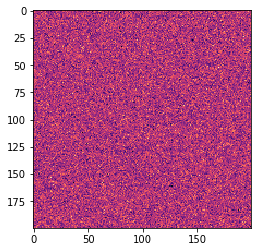

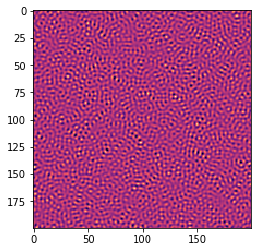

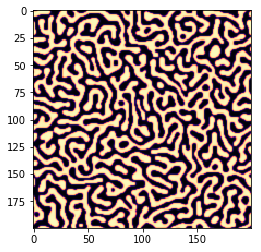

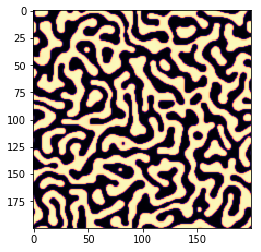

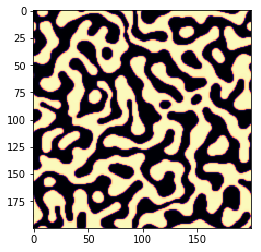

In [17]:
#run multiple iterations of simulations
for i in range (0, 5):
    for j in range (0,i**3*200):
        grid=simulate(grid)
    plt.imshow(grid, cmap='magma')
    plt.show()

In [ ]:
M=0.25
std=np.sqrt(2*k*M*300)
r=np.random.random((100, 100))
th=np.random.random((100, 100))
noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std
grid=noise+0.5

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=[5,5])
ims = []
for i in range(5000):
    grid=simulate(grid)
    im = plt.imshow(grid, animated=True, cmap='magma')
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=1)
plt.show()
    

In [36]:
#===================================== FIND FLUXES 1D CASE ==============================
def find_expected_flux_x(grid, D, dx):
    #according to ficks law of diffusion
    return -D*(np.roll(grid, -1, 0)-np.roll(grid, 1, 0))/(2*dx)



def add_noise(phi):
    std=np.sqrt(2*k*M*300) #assume 300Kelvin for temperature
    r=np.random.random((len(phi), len(phi[0])))
    th=np.random.random((len(phi), len(phi[0])))
    noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std
    return phi+noise

def add_noise_c(phi):
    dx=1.
    inversexsq=1./(dx*dx)
    laplacian=(np.roll(phi, 1, 0)+np.roll(phi, 1, 1)+np.roll(phi, -1, 0)+np.roll(phi, -1, 1)-4*phi)*inversexsq
    std=np.sqrt(2*k*M*300*np.absolute(laplacian)) #assume 300Kelvin for temperature
    r=np.random.random((len(phi), len(phi[0])))
    th=np.random.random((len(phi), len(phi[0])))
    noise=np.sqrt(-2*np.log(r))*np.cos(2*np.pi*th)*std
    return phi+noise

def find_time_flux_x(grid, dx, dt):
    grid2=add_noise(grid)
    return (grid2[:,5]-grid[:,5])*dx/dt

def find_time_flux_c(grid, dx, dt):
    grid2=add_noise_c(grid)
    return (grid2[:,5]-grid[:,5])*dx/dt

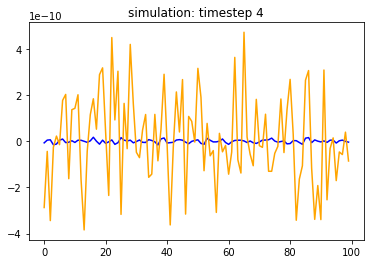

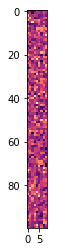

In [37]:
phi=np.full((100, 9), 0.5)
x=np.arange(0, 100, 1)
j=0

phi=add_noise(phi)
plt.figure()
plt.plot(x, find_expected_flux_x(phi[:,5], 0.25, 1.),label='expected', color='blue')
plt.plot(x, find_time_flux_x(phi, 1., 0.25),label='generated', color='orange')
plt.title('simulation: timestep '+str(i))
plt.show()
plt.imshow(phi, cmap='magma')
plt.show()


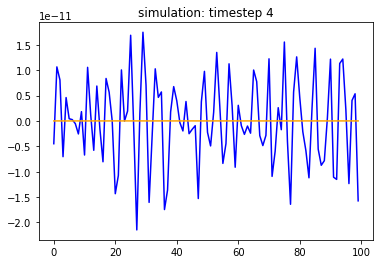

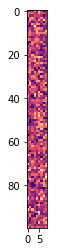

In [38]:
phi=np.full((100, 9), 0.5)
x=np.arange(0, 100, 1)
j=0

phi=add_noise(phi)
plt.figure()
plt.plot(x, find_expected_flux_x(phi[:,5], 0.25, 1.),label='expected', color='blue')
plt.plot(x, find_time_flux_c(phi, 1., 0.25),label='generated', color='orange')
plt.title('simulation: timestep '+str(i))
plt.show()
plt.imshow(phi, cmap='magma')
plt.show()